In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


In [2]:
# Reset TensorFlow state completely
tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()  # Reset the default graph as an extra precaution

In [3]:
# Part 1: Load Data
print("Loading data...")
train_data = pd.read_csv('train.csv')
x_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

Loading data...


In [4]:
# Part 2: Preprocess Data
print("Preprocessing data...")
x_train = x_train.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_train_split, x_val, y_train_split, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)
y_train_split = keras.utils.to_categorical(y_train_split, 10)
y_val = keras.utils.to_categorical(y_val, 10)


Preprocessing data...


In [5]:
# Verify shapes
print("x_train_split shape:", x_train_split.shape)
print("y_train_split shape:", y_train_split.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

x_train_split shape: (33600, 28, 28, 1)
y_train_split shape: (33600, 10)
x_val shape: (8400, 28, 28, 1)
y_val shape: (8400, 10)


In [6]:
# Part 3: Build and Compile Model
print("Building model...")
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Building model...


In [7]:
# Force model to build by calling it once (optional, ensures variables are created)
model.build(input_shape=(None, 28, 28, 1))


In [8]:
# Part 4: Train Model
print("Starting training...")
history = model.fit(x_train_split, y_train_split,
                   batch_size=128,
                   epochs=5,
                   validation_data=(x_val, y_val))

print("\nTraining completed!")

Starting training...
Epoch 1/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 34s 121ms/step - accuracy: 0.7420 - loss: 0.8163 - val_accuracy: 0.9702 - val_loss: 0.1034
Epoch 2/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 36s 103ms/step - accuracy: 0.9580 - loss: 0.1375 - val_accuracy: 0.9780 - val_loss: 0.0726
Epoch 3/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 34s 129ms/step - accuracy: 0.9700 - loss: 0.0958 - val_accuracy: 0.9826 - val_loss: 0.0541
Epoch 4/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 33s 99ms/step - accuracy: 0.9777 - loss: 0.0754 - val_accuracy: 0.9856 - val_loss: 0.0453
Epoch 5/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 42s 103ms/step - accuracy: 0.9818 - loss: 0.0584 - val_accuracy: 0.9863 - val_loss: 0.0428

Training completed!


In [9]:
# Part 5: Evaluate the Model
print("Evaluating model on validation set...")
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print(f'\nValidation accuracy: {val_accuracy:.4f}')
print(f'Validation loss: {val_loss:.4f}')

Evaluating model on validation set...
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9847 - loss: 0.0470

Validation accuracy: 0.9863
Validation loss: 0.0428


In [10]:
import matplotlib.pyplot as plt

# Part 6: Visualize Results
print("Generating visualization...")

# Plot training history
plt.figure(figsize=(12, 4))

Generating visualization...


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

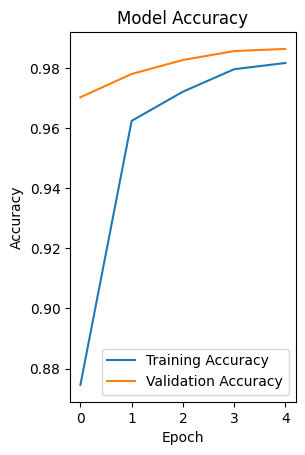

In [11]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

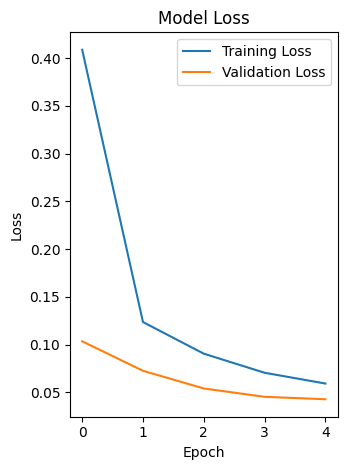

In [12]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Generating example predictions...
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


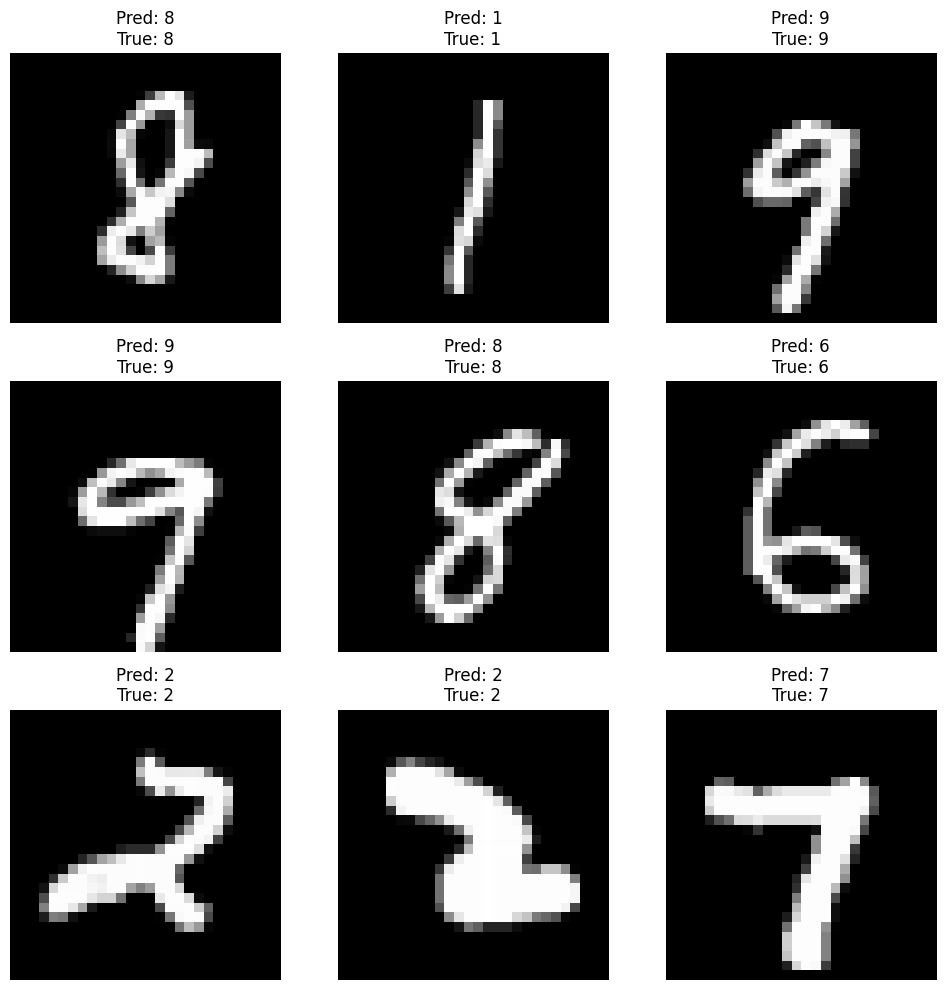

In [13]:
# Optional: Visualize some predictions
def plot_example_predictions():
    predictions = model.predict(x_val)
    num_rows, num_cols = 3, 3
    plt.figure(figsize=(10, 10))

    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(x_val[i].reshape(28, 28), cmap='gray')
        predicted_label = np.argmax(predictions[i])
        true_label = np.argmax(y_val[i])
        plt.title(f'Pred: {predicted_label}\nTrue: {true_label}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
print("Generating example predictions...")
plot_example_predictions()
